## [텐서플로우2를 이용한 선형회귀] 작성자:부성순

In [180]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

X=[20,25,30,34,40]
Y=[26,30,40,48,66]


## [단일 레이어 사용, input/output 1개]

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()
#model.add(Dense(1, input_dim=1, activation='relu'))
model.add(Dense(1, input_dim=1))
#model.add(Dense(1))

# 딥러닝을 실행합니다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=5, batch_size=10)

Epoch 1/5
1/1 [==============================] - 0s 190ms/step - loss: 3412.5132 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 3408.8413 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 3405.1711 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 0s/step - loss: 3401.5032 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 3397.8374 - accuracy: 0.0000e+00


In [182]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [183]:
#model.weights
model.get_weights()


[array([[-0.4568783]], dtype=float32), array([0.00499975], dtype=float32)]

In [184]:
#model.weights[0]
model.get_weights()[0]

array([[-0.4568783]], dtype=float32)

In [185]:
import numpy as np
x=np.array(X)
w=model.weights[0]
b=model.weights[1]
w*x+b

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[ -9.1325655, -11.416958 , -13.701349 , -15.528862 , -18.270132 ]],
      dtype=float32)>

In [186]:
y_hat=model.predict(X)
y_hat

array([[ -9.1325655],
       [-11.416958 ],
       [-13.701349 ],
       [-15.528862 ],
       [-18.270132 ]], dtype=float32)

In [187]:
model.evaluate(X, Y)


1/1 [==============================] - 0s 72ms/step - loss: 3394.1733 - accuracy: 0.0000e+00


[3394.17333984375, 0.0]

In [188]:
model.evaluate(np.array(X), np.array(Y))

1/1 [==============================] - 0s 16ms/step - loss: 3394.1733 - accuracy: 0.0000e+00


[3394.17333984375, 0.0]

In [189]:
np.mean((np.array(Y).reshape(-1,1)-y_hat)**2)

3394.173586765531

## [은닉층 레이어 사용]

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X=[20,25,30,34,40]
Y=[26,30,40,48,66]


# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Dense(1))

# 딥러닝을 실행합니다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=5, batch_size=10)

Epoch 1/5
1/1 [==============================] - 0s 208ms/step - loss: 476.7197 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 474.2836 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 0s/step - loss: 471.8514 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 0s/step - loss: 469.4235 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 466.9999 - accuracy: 0.0000e+00


In [117]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
 dense_33 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.get_weights()

[array([[-0.1181471]], dtype=float32),
 array([0.00499919], dtype=float32),
 array([[0.87647617]], dtype=float32),
 array([0.00499969], dtype=float32)]

In [119]:
import numpy as np
x=np.array(X)
w=model.weights[0]
b=model.weights[1]
y_hat1=w*x+b
y_hat1

w=model.weights[2]
b=model.weights[3]
y_hat2=w*y_hat1+b
y_hat2

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[-2.061681 , -2.5794466, -3.097212 , -3.5114245, -4.1327434]],
      dtype=float32)>

In [120]:
y_hat=model.predict(X)
y_hat

array([[-2.061681 ],
       [-2.5794466],
       [-3.097212 ],
       [-3.5114245],
       [-4.1327434]], dtype=float32)

In [121]:
model.evaluate(X, Y)

1/1 [==============================] - 0s 82ms/step - loss: 2255.6553 - accuracy: 0.0000e+00


[2255.6552734375, 0.0]

In [122]:
np.mean((np.array(Y).reshape(-1,1)-y_hat)**2)


2255.655303633097

## [레이어1개층에 Dense2개이상 구성]
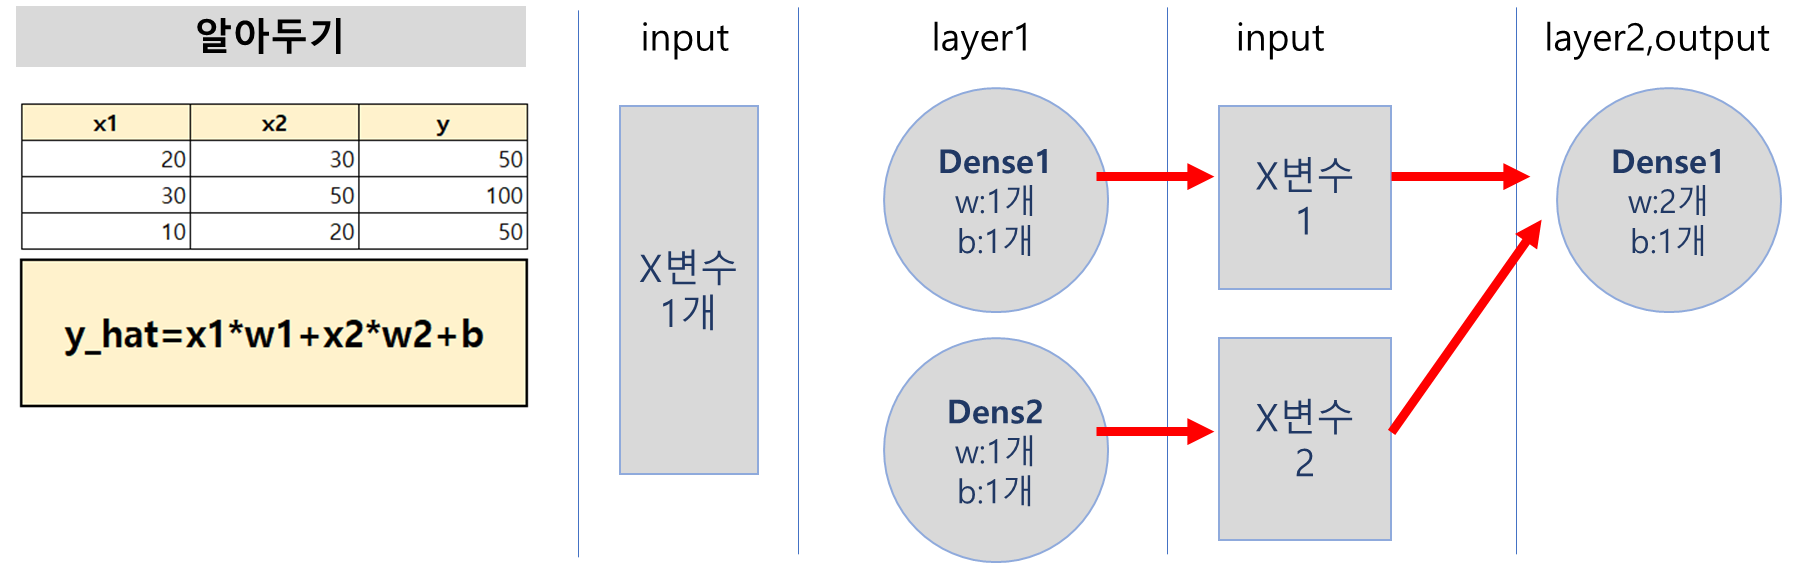

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X=[20,25,30,34,40]
Y=[26,30,40,48,66]


# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))

# 딥러닝을 실행합니다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=5, batch_size=10)

Epoch 1/5
1/1 [==============================] - 0s 198ms/step - loss: 3924.5325 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 3908.4351 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 0s/step - loss: 3892.3718 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 3876.3430 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 0s/step - loss: 3860.3508 - accuracy: 0.0000e+00


In [163]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 2)                 4         
                                                                 
 dense_40 (Dense)            (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [164]:
#model.get_weights()
model.weights

[<tf.Variable 'dense_39/kernel:0' shape=(1, 2) dtype=float32, numpy=array([[-1.1041236,  0.9108878]], dtype=float32)>,
 <tf.Variable 'dense_39/bias:0' shape=(2,) dtype=float32, numpy=array([0.00499871, 0.00499958], dtype=float32)>,
 <tf.Variable 'dense_40/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[1.2391924],
        [0.8653472]], dtype=float32)>,
 <tf.Variable 'dense_40/bias:0' shape=(1,) dtype=float32, numpy=array([0.00499907], dtype=float32)>]

In [165]:
model.get_weights()


[array([[-1.1041236,  0.9108878]], dtype=float32),
 array([0.00499871, 0.00499958], dtype=float32),
 array([[1.2391924],
        [0.8653472]], dtype=float32),
 array([0.00499907], dtype=float32)]

In [167]:
import numpy as np
x=np.array(X)

import numpy as np
x=np.array(X)

# 1번레이어의 1번째 node의 w와 b값
w=model.weights[0][0][0]
b=model.weights[1][0]
x1=w*x+b

# 1번레이어의 2번째 node의 w와 b값
w=model.weights[0][0][1]
b=model.weights[1][1]
x2=w*x+b

x1, '/', x2

(<tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([-22.077473, -27.598091, -33.11871 , -37.535206, -44.159946],
       dtype=float32)>,
 '/',
 <tf.Tensor: shape=(5,), dtype=float32, numpy=
 array([18.222755, 22.777193, 27.331633, 30.975183, 36.440514],
       dtype=float32)>)

In [171]:
w1=model.weights[2][0]
w2=model.weights[2][1]
b=model.weights[3][0]

y_hat=w1*x1+w2*x2+b
y_hat

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-11.584227, -14.484165, -17.3841  , -19.704052, -23.183971],
      dtype=float32)>

In [172]:
y_hat=model.predict(X)
y_hat

array([[-11.584227],
       [-14.484165],
       [-17.3841  ],
       [-19.704052],
       [-23.183971]], dtype=float32)

In [173]:
model.evaluate(X, Y)

1/1 [==============================] - 0s 92ms/step - loss: 3844.3940 - accuracy: 0.0000e+00


[3844.39404296875, 0.0]

In [174]:
np.mean((np.array(Y).reshape(-1,1)-y_hat)**2)


3844.3938759442112

## [레이어 param만 확인하는용도로 사용]
https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [190]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

40960/30286 [========================================] - 0s 8us/step


'C:\\Users\\BSS\\.keras\\datasets\\auto-mpg.data'

In [192]:
import pandas as pd
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [193]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [194]:
dataset = dataset.dropna()

In [195]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [197]:
X=dataset[['Cylinders','Displacement','Horsepower']].values
Y=dataset['MPG']
X

array([[  8., 307., 130.],
       [  8., 350., 165.],
       [  8., 318., 150.],
       ...,
       [  4., 135.,  84.],
       [  4., 120.,  79.],
       [  4., 119.,  82.]])

In [212]:

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()
model.add(Dense(2, input_dim=3))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))

# 딥러닝을 실행합니다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=5, batch_size=10)

Epoch 1/5
40/40 [==============================] - 0s 909us/step - loss: 636.2867 - accuracy: 0.0000e+00
Epoch 2/5
40/40 [==============================] - 0s 925us/step - loss: 371.0588 - accuracy: 0.0000e+00
Epoch 3/5
40/40 [==============================] - 0s 749us/step - loss: 292.7911 - accuracy: 0.0000e+00
Epoch 4/5
40/40 [==============================] - 0s 869us/step - loss: 269.1807 - accuracy: 0.0000e+00
Epoch 5/5
40/40 [==============================] - 0s 948us/step - loss: 261.7350 - accuracy: 0.0000e+00


In [213]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 2)                 8         
                                                                 
 dense_57 (Dense)            (None, 3)                 9         
                                                                 
 dense_58 (Dense)            (None, 1)                 4         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


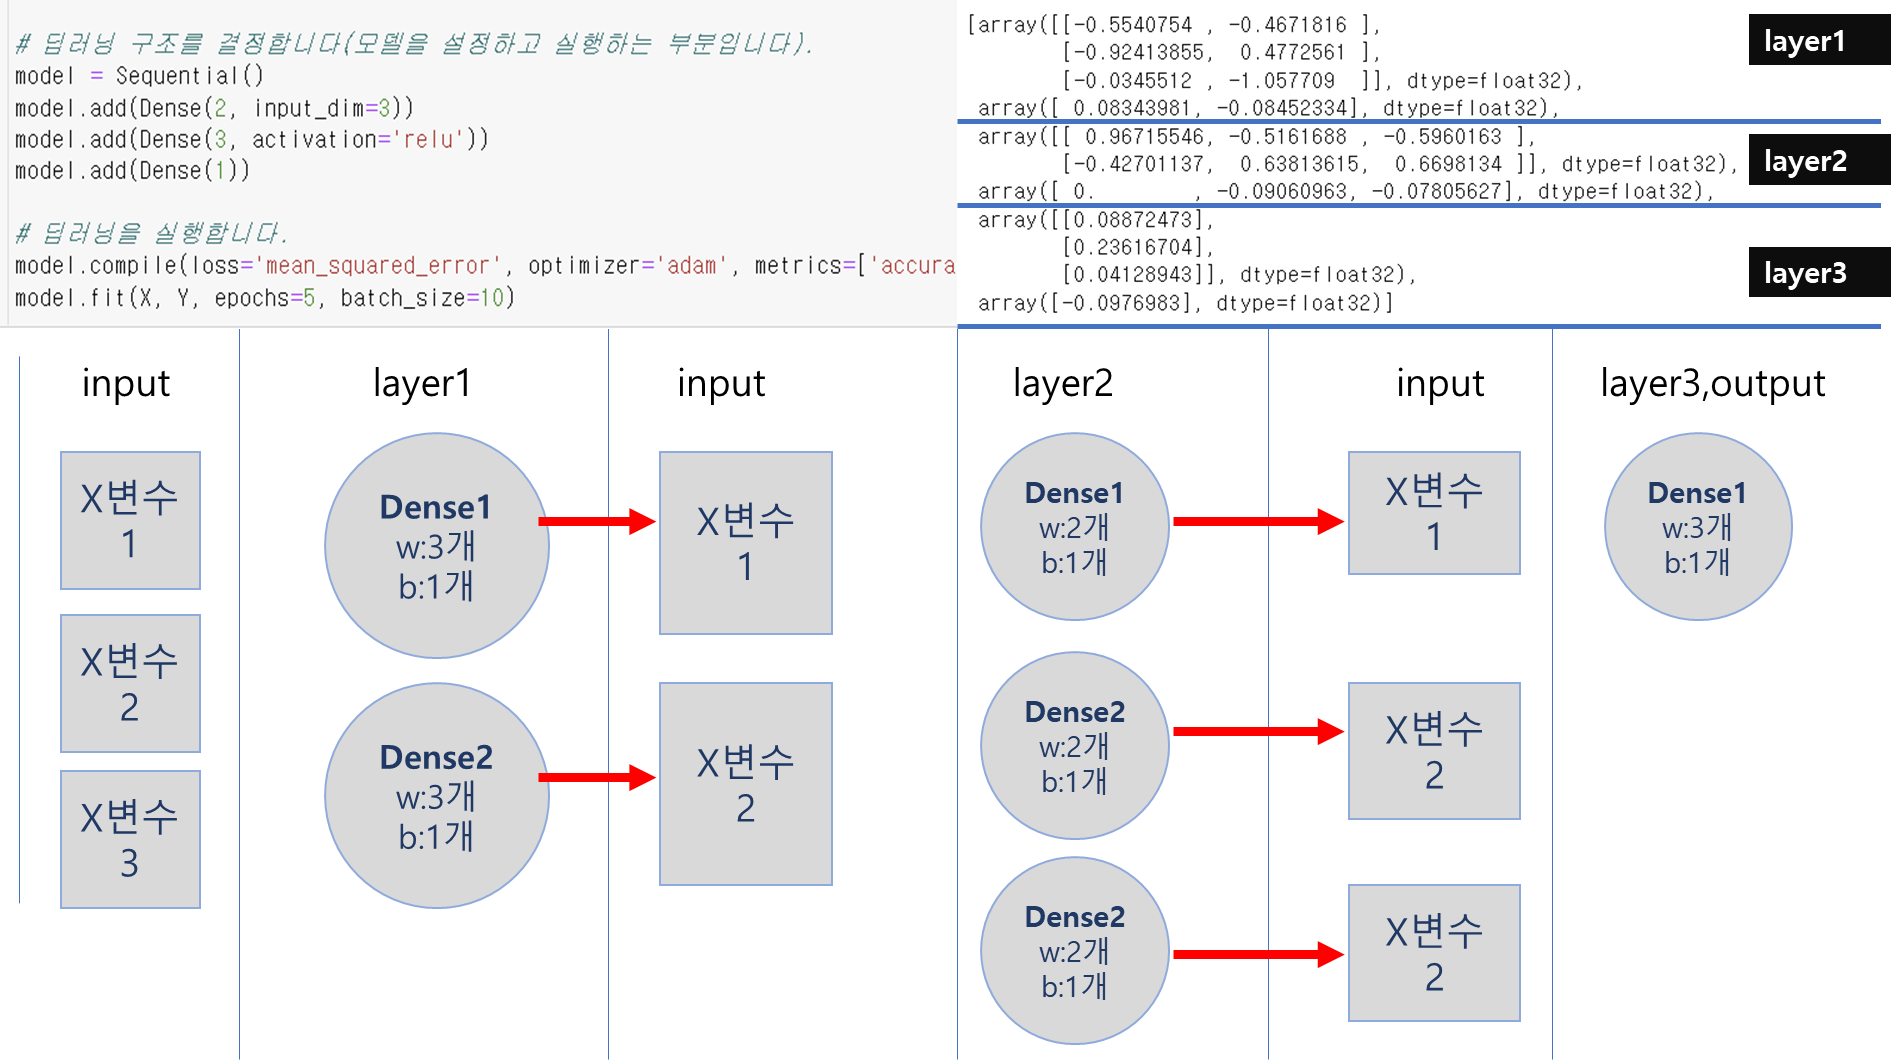

In [214]:
model.get_weights()

[array([[-1.1244723 , -0.26288345],
        [ 0.04581462, -0.49265847],
        [ 0.8703357 , -0.05683772]], dtype=float32),
 array([-0.01365603,  0.01388389], dtype=float32),
 array([[-0.78919303,  0.64658576,  0.47023255],
        [-0.08906257, -0.68662584,  0.76397085]], dtype=float32),
 array([ 0.        , -0.01224192,  0.01017989], dtype=float32),
 array([[0.9456526 ],
        [0.13828124],
        [0.03491058]], dtype=float32),
 array([-0.0042292], dtype=float32)]

In [223]:
from tensorflow.keras.layers import Dropout

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()
model.add(Dense(2, input_dim=3))
model.add(Dropout(0.8))
model.add(Dense(3, activation='relu'))

model.add(Dense(1))

# 딥러닝을 실행합니다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=5, batch_size=10)
model.summary()


#   model = tf.keras.models.Sequential([
#     keras.layers.Dense(512, activation='relu', input_shape=(784,)),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(10)
#   ])


Epoch 1/5
40/40 [==============================] - 0s 902us/step - loss: 35564.2031 - accuracy: 0.0000e+00
Epoch 2/5
40/40 [==============================] - 0s 862us/step - loss: 35757.4141 - accuracy: 0.0000e+00
Epoch 3/5
40/40 [==============================] - 0s 800us/step - loss: 19218.0938 - accuracy: 0.0000e+00
Epoch 4/5
40/40 [==============================] - 0s 794us/step - loss: 14223.7832 - accuracy: 0.0000e+00
Epoch 5/5
40/40 [==============================] - 0s 936us/step - loss: 9332.5615 - accuracy: 0.0000e+00
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 2)                 8         
                                                                 
 dropout_1 (Dropout)         (None, 2)                 0         
                                                                 
 dense_73 (Dense)            (None, 3)         

In [224]:
model.get_weights()

[array([[ 0.8313634 ,  0.77239305],
        [-0.06095242, -0.5166019 ],
        [-0.4251902 ,  0.81456196]], dtype=float32),
 array([0.13168165, 0.015621  ], dtype=float32),
 array([[ 0.9890249 , -0.7261144 ,  0.36542642],
        [ 0.59415585,  0.14309795, -0.8984622 ]], dtype=float32),
 array([-0.08378595, -0.13787715, -0.08092465], dtype=float32),
 array([[0.8967428],
        [1.0939803],
        [0.3618147]], dtype=float32),
 array([-0.12687194], dtype=float32)]